In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import os
import re

In [6]:
np.ceil(365/25)

15.0

In [9]:
delta = np.ceil(365/25)
days = []
for i in range(25):
    days.append(int((i) * delta + 1))
days

[1,
 16,
 31,
 46,
 61,
 76,
 91,
 106,
 121,
 136,
 151,
 166,
 181,
 196,
 211,
 226,
 241,
 256,
 271,
 286,
 301,
 316,
 331,
 346,
 361]

In [23]:
dict_params = {}
dataframes = {}
i = 0
for foldername, foldchildren, filechildren in os.walk('./results/encoder'):
    if 'julia' in foldername:
        continue
    
    if len(filechildren) > 0:
        for file in filechildren:
            regex = "checkpoint_4[9][5-9][0-9].csv"
            if "SARSA" in foldername:
                regex  = "checkpoint_2[4,5][5-9][0-9].csv"
            if re.search(regex, file):
                split = foldername.replace('n_steps','n-steps').replace('\\','/').split('/')
                filename = os.path.join(foldername, file) 

                model = split[3]
                params = split[4].split('_')

                r ={'model':model}
                for p in params:
                    x = p.split('=')
                    r[x[0]] = float(x[1])

                if dict_params.get(foldername) is None:
                    dict_params[foldername] = r
                    dataframes[foldername] = []
                dataframes[foldername].append(pd.read_csv(filename, parse_dates=[0], index_col=0))

                print(model, params, filename)

ACTOR_CRITIC ['learning-rate=0.9', 'decay-rate=0.7', 'n-steps=16', 'tuple-size=160', 'encoder-size=1024'] ./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160_encoder-size=1024\checkpoint_4950.csv
ACTOR_CRITIC ['learning-rate=0.9', 'decay-rate=0.7', 'n-steps=16', 'tuple-size=160', 'encoder-size=1024'] ./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160_encoder-size=1024\checkpoint_4975.csv
ACTOR_CRITIC ['learning-rate=0.9', 'decay-rate=0.7', 'n-steps=16', 'tuple-size=160', 'encoder-size=1024'] ./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160_encoder-size=1024\checkpoint_4976.csv
ACTOR_CRITIC ['learning-rate=0.9', 'decay-rate=0.7', 'n-steps=16', 'tuple-size=160', 'encoder-size=1024'] ./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160_encoder-size=1024\checkpoint_4977.csv
ACTOR_CRITIC ['learning-rate=0.9', 'decay-rate=0.7', 'n-steps=16

In [24]:
split

['.',
 'results',
 'encoder',
 'SARSA',
 'epsilon=0.5_learning-rate=0.98_decay-rate=0.25_n-steps=4_encoder-size=512_tuple-size=720']

In [25]:
results = {}
model = 'SARSA'

dfr = []
examples_cs = {}
examples_br = {}

for folder in dict_params:
    print(folder)
    example_cs = pd.DataFrame()
    example_br = pd.DataFrame()
    ghi = 0
    ratio = 0

    sghi = 0
    sref = 0#,[]
    smodel = 0#,[]
    for df in dataframes[folder]:
        if df.ghi.sum() > ghi:
            example_cs = df.copy()
            ghi = df.ghi.sum()

        if df.POA.sum()/df.mg.sum() > ratio:
            example_br = df.copy()
            ratio = df.POA.sum()/df.mg.sum() 

        sghi += df.ghi.sum()
        sref += df.mg.sum()# [df.mg.sum()/df.ghi.sum()]
        smodel += df.POA.sum()# [df.POA.sum()/df.ghi.sum()]

    examples_cs[folder] = example_cs
    examples_br[folder] = example_br
        
    r =  dict_params[folder]


    r['model_transp'] = smodel/sghi# np.median(smodel)
    r['ref_transp'] = sref/sghi# np.median(sref)


    dfr.append(r)

./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160_encoder-size=1024
./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160_encoder-size=128
./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160_encoder-size=2048
./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160_encoder-size=256
./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160_encoder-size=4096
./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160_encoder-size=512
./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=320_encoder-size=1024
./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=320_encoder-size=128
./results/encoder\ACTOR_CRITIC\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=320_encoder-size=2048
./results/encoder\ACTOR_CRITIC\l

In [26]:
dffinal = pd.DataFrame.from_records(dfr).assign(ratio = lambda dfx: dfx.model_transp/dfx.ref_transp)
dffinal.sort_values('ratio', ascending=False).head(10)

,model,learning-rate,decay-rate,n-steps,tuple-size,encoder-size,model_transp,ref_transp,epsilon,ratio
35,SARSA,0.98,0.25,4.0,160.0,1024.0,1.031394,1.122999,0.5,0.918428
15,REINFORCE,0.25,0.70,NaN,10.0,128.0,1.024918,1.123064,NaN,0.912609
38,SARSA,0.98,0.25,4.0,40.0,1024.0,1.002813,1.113613,0.5,0.900504
16,REINFORCE,0.25,0.70,NaN,160.0,1024.0,0.979026,1.092450,NaN,0.896175
21,REINFORCE,0.25,0.70,NaN,160.0,512.0,0.991994,1.109515,NaN,0.894079
42,SARSA,0.98,0.25,4.0,20.0,128.0,0.997272,1.116720,0.5,0.893037
56,SARSA,0.98,0.25,4.0,40.0,256.0,1.012373,1.134219,0.5,0.892573
20,REINFORCE,0.25,0.70,NaN,160.0,4096.0,1.002853,1.125083,NaN,0.891359
18,REINFORCE,0.25,0.70,NaN,160.0,2048.0,1.019845,1.144501,NaN,0.891083
17,REINFORCE,0.25,0.70,NaN,160.0,128.0,1.001399,1.131490,NaN,0.885026


In [27]:
dffinal.groupby('model')[['model_transp']].max()

,model_transp
model,
ACTOR_CRITIC,0.933746
REINFORCE,1.024918
SARSA,1.031394


In [28]:
dffinal.groupby('model').count()

,learning-rate,decay-rate,n-steps,tuple-size,encoder-size,model_transp,ref_transp,epsilon,ratio
model,,,,,,,,,
ACTOR_CRITIC,15,15,15,15,15,15,15,0,15
REINFORCE,19,19,0,19,19,19,19,0,19
SARSA,35,35,35,35,35,35,35,35,35


In [29]:
df = examples_cs['./results/v02\\ACTOR_CRITIC\\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160']
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'POA', c='red')
plt.xticks([df.index.min(), df.index.max()])
plt.legend()

KeyError: './results/v02\\ACTOR_CRITIC\\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160'

In [ ]:
df = examples_br['./results/v02\\ACTOR_CRITIC\\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160']
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'POA', c='red')
plt.xticks([df.index.min(), df.index.max()])
plt.legend()

KeyError: './results/v02\\ACTOR_CRITIC\\learning-rate=0.9_decay-rate=0.7_n-steps=16_tuple-size=160'

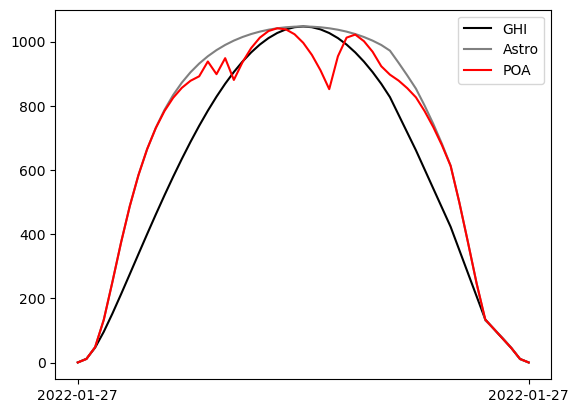

In [ ]:
df = examples_cs['./results/v02\\REINFORCE\\learning-rate=0.25_decay-rate=0.7_tuple-size=10']
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'POA', c='red')
plt.xticks([df.index.min(), df.index.max()])
plt.legend()

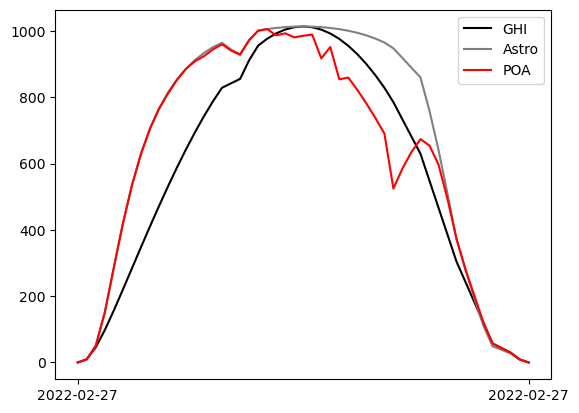

In [ ]:
df = examples_cs['./results/v02\SARSA\epsilon=0.5_learning-rate=0.98_decay-rate=0.25_n_steps=4_tuple-size=320']
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'POA', c='red')
plt.xticks([df.index.min(), df.index.max()])
plt.legend()

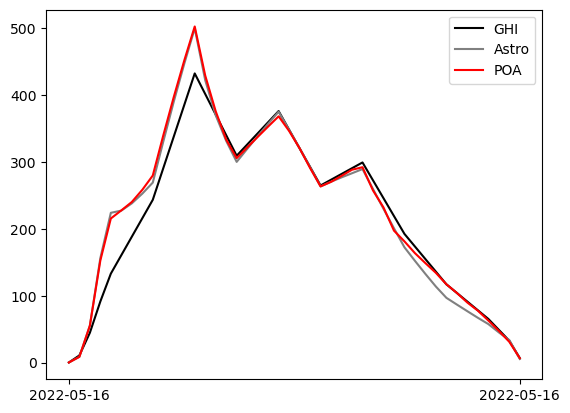

In [ ]:
df = examples_br['./results/v02\\REINFORCE\\learning-rate=0.25_decay-rate=0.7_tuple-size=10']
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'POA', c='red')
plt.xticks([df.index.min(), df.index.max()])
plt.legend()

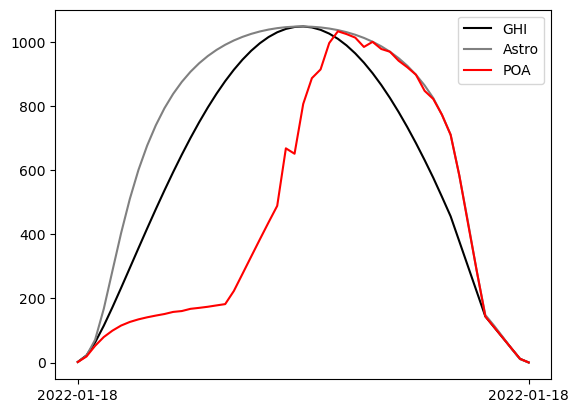

In [ ]:
df = pd.read_csv('results/REINFORCE/learning-rate=0.9_decay-rate=0.5_tuple-size=160/checkpoint_2497.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'POA', c='red')
plt.xticks([df.index.min(), df.index.max()])
plt.legend()

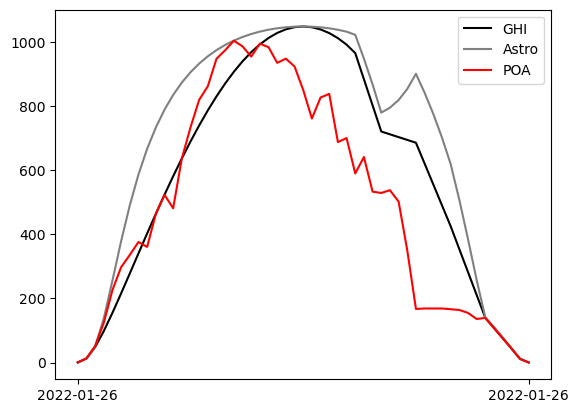

In [ ]:
df = pd.read_csv('results/REINFORCE/learning-rate=0.98_decay-rate=0.5_tuple-size=160/checkpoint_2500.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'POA', c='red')
plt.xticks([df.index.min(), df.index.max()])
plt.legend()